In [2]:
import pandas as pd
import pygwalker as pyg
import pathlib
import numpy as np
from ydata_profiling import ProfileReport
from tools.dataset import get_dataset
from IPython.display import display, Markdown, Latex
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000 # avoid matplotlib overflow error
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '14'
import sweetviz
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import pygwalker as pyg
path = r"/Users/soumensardar/Library/CloudStorage/GoogleDrive-soumensardarintmain@gmail.com/.shortcut-targets-by-id/1zlA8VX-l_IufCZSfJIfxohpsEGrcLx4-/Taniya Paul Thesis paper/writing/Figures and Charts"

In [4]:
dicti = pd.read_excel("all-results-trimed.xlsx", sheet_name=['dataset'])
df = pd.concat([dicti['dataset']])
df["Size(M)"] = df["Size"] / 1_000_000
df.head(20)

,Dataset,Total Size,Train Size,Test Size,Size,Split,Time Period,Total Time Period,Train Time Period,Test Time Period,Original Count,Extra Feature Count,With Extra Feature,Feature Count,Size(M)
0,Future Sales,2935849,2348679,587170,2348679,train,735.000000,1033.000000,735.000000,298.0000,7,12,yes,7,2.348679
1,Future Sales,2935849,2348679,587170,587170,test,298.000000,1033.000000,735.000000,298.0000,7,12,no,12,0.587170
2,Forecasts for\n Product Demand,1037336,829868,207468,829868,train,1783.000000,2193.000000,1783.000000,410.0000,7,12,yes,7,0.829868
3,Forecasts for\n Product Demand,1037336,829868,207468,207468,test,410.000000,2193.000000,1783.000000,410.0000,7,12,no,12,0.207468
4,US Livestock\n Meat Imports,237165,189732,47433,189732,train,10196.000000,127691.000000,10196.000000,2495.0000,5,10,yes,5,0.189732
5,US Livestock\n Meat Imports,237165,189732,47433,47433,test,2495.000000,127691.000000,10196.000000,2495.0000,5,10,no,10,0.047433
6,Online Retail,406829,325463,81366,325463,train,336.090270,373.183330,336.090270,37.0931,9,10,yes,9,0.325463
7,Online Retail,406829,325463,81366,81366,test,37.093100,373.183330,336.090270,37.0931,9,10,no,10,0.081366
8,Online Retail 2,824364,659491,164873,659491,train,647.308333,738.211805,647.308333,90.9035,9,14,yes,9,0.659491
9,Online Retail 2,824364,659491,164873,164873,test,90.903500,738.211805,647.308333,90.9035,9,14,no,14,0.164873


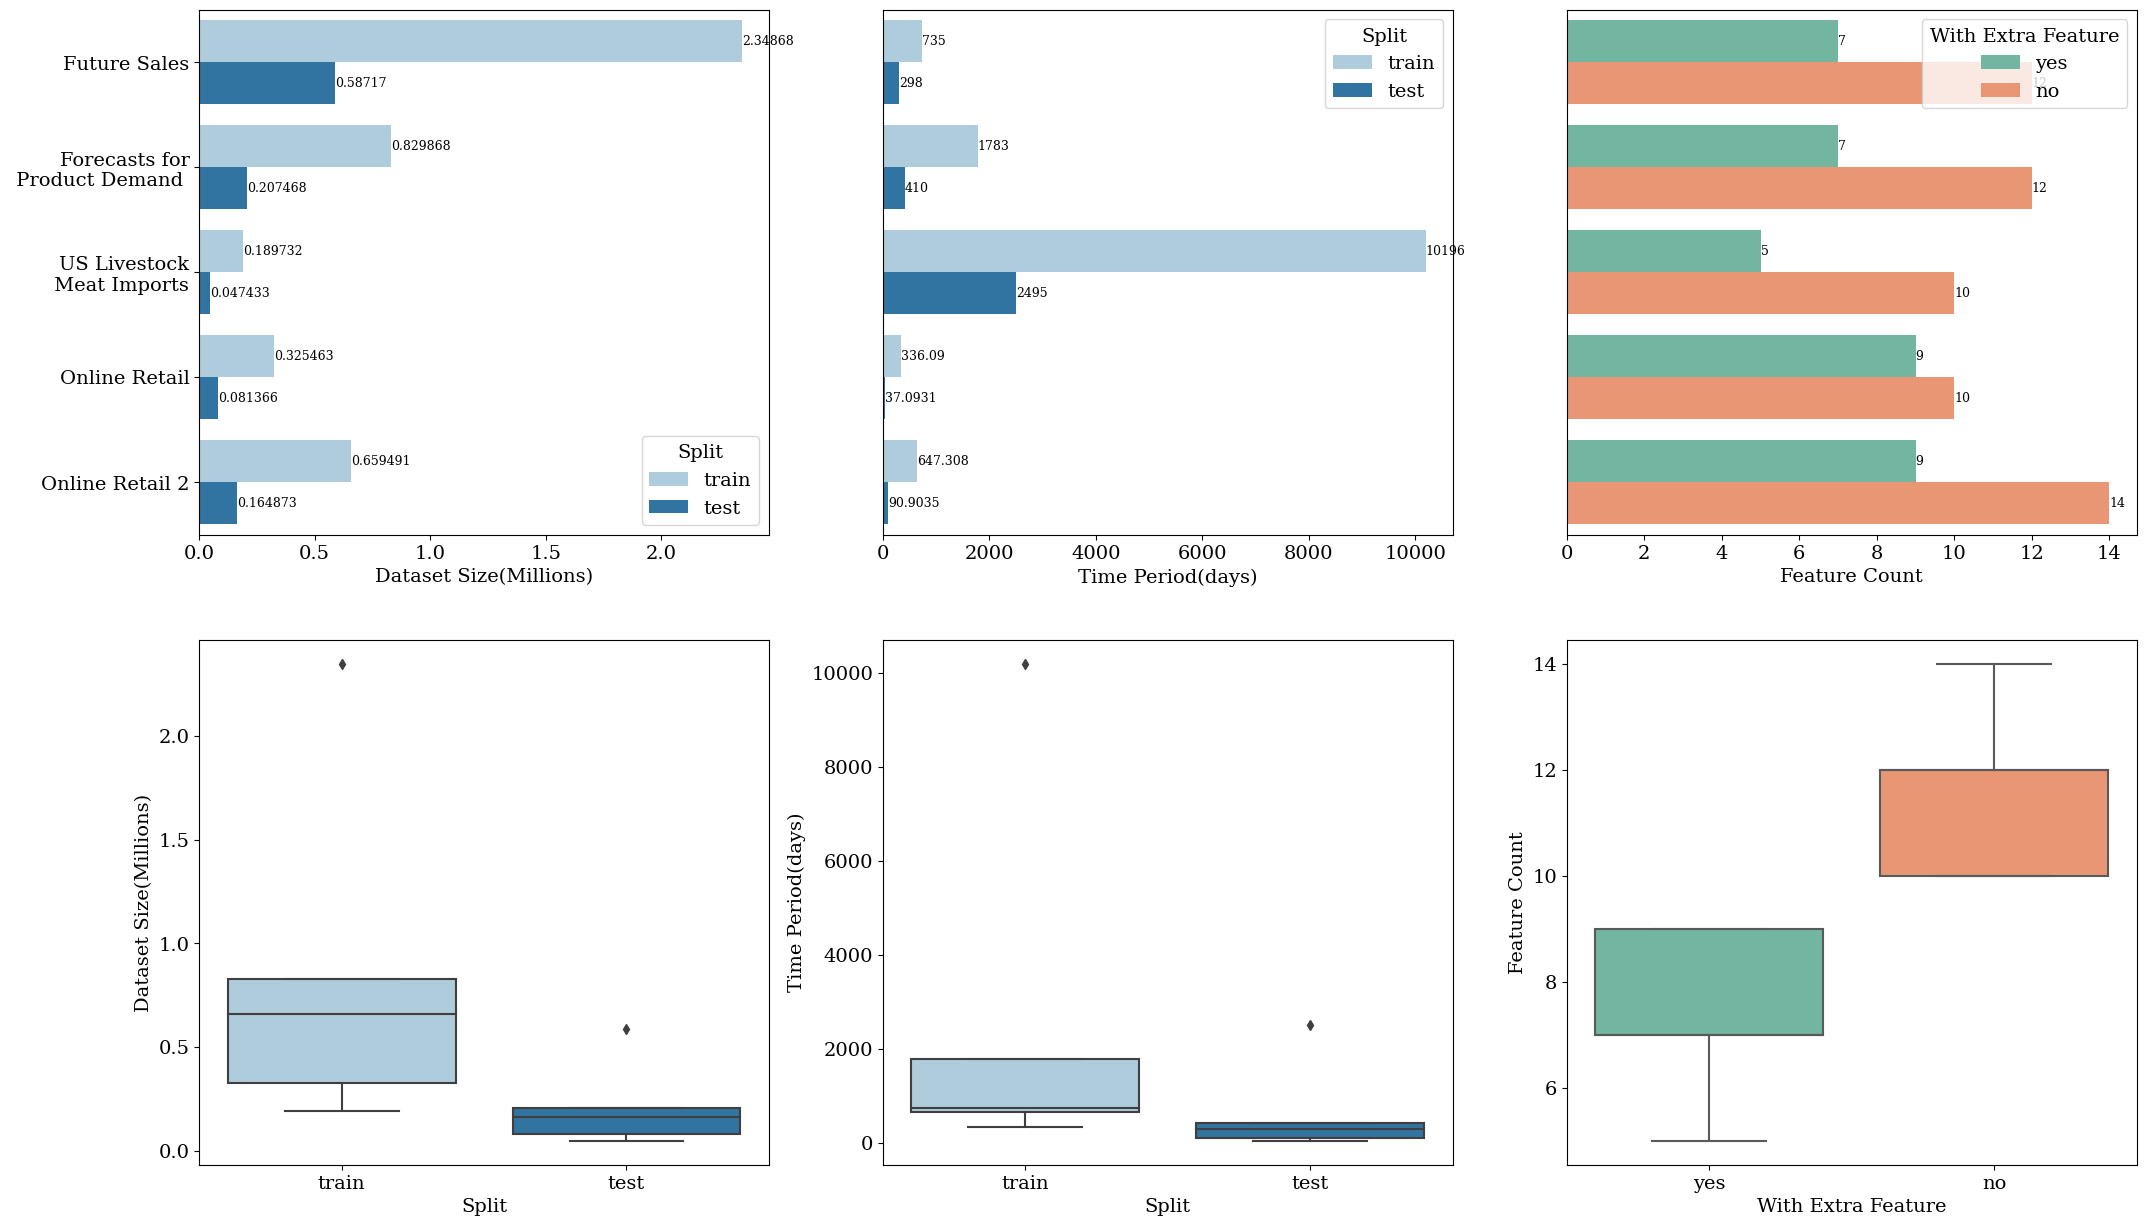

In [5]:
plt.figure(figsize=(25, 15))
ax = plt.subplot(2,3,1)
ax = sns.barplot(data=df, x='Size(M)', hue='Split', y='Dataset', palette="Paired", ax=ax)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xlabel("Dataset Size(Millions)")
plt.ylabel("")

ax = plt.subplot(2,3,2)
ax=sns.barplot(data=df, x='Time Period', hue='Split', y='Dataset', palette="Paired", ax=ax)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xlabel("Time Period(days)")
plt.yticks([])
plt.ylabel("")

ax = plt.subplot(2,3,3)
ax=sns.barplot(data=df, x='Feature Count', hue='With Extra Feature', y='Dataset', palette="Set2", ax=ax)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.yticks([])
plt.ylabel("")


ax=plt.subplot(2,3,4)
sns.boxplot(data=df, y='Size(M)', ax=ax, x="Split", palette="Paired")
plt.ylabel("Dataset Size(Millions)")

ax=plt.subplot(2,3,5)
# sns.histplot(data=df, x='Time Period', ax=ax, hue='Split', element="step", palette="Set2", bins=10)
sns.boxplot(data=df, y='Time Period', ax=ax, x="Split", palette="Paired")
plt.ylabel("Time Period(days)")

ax=plt.subplot(2,3,6)
sns.boxplot(data=df, y='Feature Count', ax=ax, x='With Extra Feature', palette="Set2")




plt.savefig(f"{path}/experimental-dataset-statistics.png")
plt.show()

In [18]:
df.drop(columns=["Total Size", "Size", "Time Period", "Total Time Period", "Feature Count",	"Size(M)"], index=[0,2,4,6,8]).describe().T.drop(columns=['count', 'std']).T

,Train Size,Test Size,Train Time Period,Test Time Period,Original Count,Extra Feature Count
mean,870646.6,217662.0,2739.479721,666.19932,7.4,11.6
min,189732.0,47433.0,336.090270,37.09310,5.0,10.0
25%,325463.0,81366.0,647.308333,90.90350,7.0,10.0
50%,659491.0,164873.0,735.000000,298.00000,7.0,12.0
75%,829868.0,207468.0,1783.000000,410.00000,9.0,12.0
max,2348679.0,587170.0,10196.000000,2495.00000,9.0,14.0


In [7]:
# pyg.walk(df)